In [2]:
from imblearn.under_sampling import *
imblearn.__version__

'0.5.0'

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import time

In [4]:
df_ss = pd.read_csv('df_ss.csv')
df_ss

,roster_members,roster_rank,DBNOs,assists,boosts,kills,killStreaks,headshotKills,roadKills,teamKills,...,heals,revives,deathType,rideDistance,swimDistance,walkDistance,timeSurvived,weaponsAcquired,rank,class
0,4,0.203064,-0.627376,-0.410764,-0.874200,-0.791530,-0.857196,-0.394914,-0.05071,-0.160992,...,0.195163,-0.318406,byplayer,-0.564602,-0.257126,-0.306593,-0.416715,-0.048114,23,0
1,4,0.203064,-0.627376,-0.410764,-0.874200,-0.791530,-0.857196,-0.394914,-0.05071,-0.160992,...,-0.709011,-0.318406,byplayer,-0.564602,-0.257126,-0.307948,-0.435575,-0.048114,23,0
2,4,0.203064,1.733746,-0.410764,0.051318,0.414189,0.878259,-0.394914,-0.05071,-0.160992,...,-0.709011,-0.318406,byplayer,-0.564602,-0.257126,-0.369169,-0.343439,-0.576447,23,0
3,4,0.203064,-0.627376,-0.410764,-0.874200,-0.791530,-0.857196,-0.394914,-0.05071,-0.160992,...,-0.709011,-0.318406,byplayer,-0.564602,-0.257126,-0.115772,-0.465631,0.979629,23,0
4,3,-1.010003,-0.627376,-0.410764,-0.874200,-0.791530,-0.857196,-0.394914,-0.05071,-0.160992,...,-0.709011,-0.318406,byplayer,-0.564602,-0.257126,-1.062670,-1.754486,-2.594066,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13020,2,-1.157446,1.733746,-0.410764,1.518229,0.414189,0.878259,-0.394914,-0.05071,-0.160992,...,1.099337,-0.318406,byplayer,-0.564602,-0.257126,1.050206,1.281485,0.979629,6,0
13021,2,-1.157446,0.862326,-0.410764,0.976836,0.414189,0.878259,1.980801,-0.05071,-0.160992,...,-0.709011,-0.318406,byplayer,-0.564602,-0.257126,1.081448,1.217547,0.361693,6,0
13022,3,-0.658373,0.862326,1.856426,0.592711,1.119490,0.878259,-0.394914,-0.05071,-0.160992,...,2.532419,-0.318406,byplayer,1.868958,-0.257126,0.590403,0.689595,1.224862,10,0
13023,3,-0.658373,0.862326,-0.410764,-0.874200,0.414189,0.878259,1.980801,-0.05071,-0.160992,...,-0.709011,-0.318406,byplayer,-0.564602,-0.257126,-0.748008,-0.394401,-0.048114,10,0


In [7]:
y = df_ss['class']
X = df_ss.drop(['roster_rank','rank','class','deathType'], axis=1)

In [8]:
X_samp, y_samp = EditedNearestNeighbours(kind_sel="all", n_neighbors=5).fit_sample(X, y)
print(X.shape, y.shape, X_samp.shape, y_samp.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(13025, 18) (13025,) (12046, 18) (12046,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [24]:
X_samp_df = pd.DataFrame(X_samp, columns=X.columns)
X_samp_df.shape

(12046, 18)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import mean_squared_error

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X_samp_df, y_samp, stratify=y_samp, test_size=0.3, random_state=1)

rf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=1)
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
cr = classification_report(y_test, pred_rf)
print(cr)
roc_auc = roc_auc_score(y_test, pred_rf)
print("{:.4f}".format(roc_auc))

#  before UnderSampling  score
#               precision    recall  f1-score   support

#            0       0.98      1.00      0.99      3805
#            1       0.59      0.19      0.29       103

#     accuracy                           0.98      3908
#    macro avg       0.78      0.60      0.64      3908
# weighted avg       0.97      0.98      0.97      3908
#        roc   0.5952

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3511
           1       0.85      0.39      0.53       103

    accuracy                           0.98      3614
   macro avg       0.92      0.69      0.76      3614
weighted avg       0.98      0.98      0.98      3614

0.6932


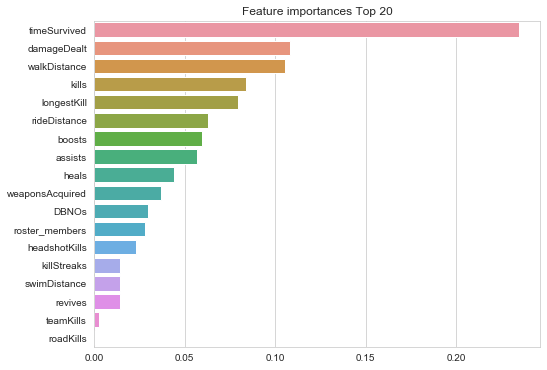

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

# 모델 내에서 feature importance를 추출하고 정렬하는 과정
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [26]:
lgbm = LGBMClassifier(n_estimators=1000, n_jobs=-1, random_state=1)
lgbm.fit(x_train, y_train, eval_set=[(x_test, y_test)], eval_metric='neg_mean_squared_error',
         early_stopping_rounds=100)

pred_lgbm = lgbm.predict(x_test)
cr = classification_report(y_test, pred_lgbm)
print(cr)
roc_auc = roc_auc_score(y_test, pred_lgbm)
print("{:.4f}".format(roc_auc))

# LGBM Classifier before undersampling score
#               precision    recall  f1-score   support

#            0       0.98      0.99      0.99      3805
#            1       0.53      0.30      0.38       103

#     accuracy                           0.97      3908
#    macro avg       0.75      0.65      0.68      3908
# weighted avg       0.97      0.97      0.97      3908

# 0.6468

[1]	valid_0's binary_logloss: 0.0952309
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.0878211
[3]	valid_0's binary_logloss: 0.0828774
[4]	valid_0's binary_logloss: 0.0795919
[5]	valid_0's binary_logloss: 0.0764639
[6]	valid_0's binary_logloss: 0.0739133
[7]	valid_0's binary_logloss: 0.0719452
[8]	valid_0's binary_logloss: 0.0700392
[9]	valid_0's binary_logloss: 0.0680657
[10]	valid_0's binary_logloss: 0.0663651
[11]	valid_0's binary_logloss: 0.0651828
[12]	valid_0's binary_logloss: 0.064072
[13]	valid_0's binary_logloss: 0.0630321
[14]	valid_0's binary_logloss: 0.0623436
[15]	valid_0's binary_logloss: 0.0618974
[16]	valid_0's binary_logloss: 0.0612982
[17]	valid_0's binary_logloss: 0.0608735
[18]	valid_0's binary_logloss: 0.0603765
[19]	valid_0's binary_logloss: 0.0601488
[20]	valid_0's binary_logloss: 0.0597795
[21]	valid_0's binary_logloss: 0.0593358
[22]	valid_0's binary_logloss: 0.0588726
[23]	valid_0's binary_logloss: 0.0585517
[24]	

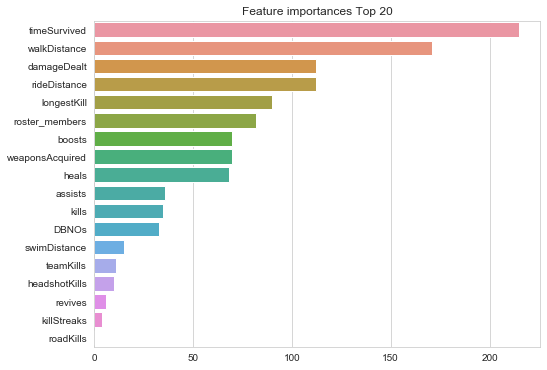

In [27]:
sns.set_style('whitegrid')

# 모델 내에서 feature importance를 추출하고 정렬하는 과정
ftr_importances_values = lgbm.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [29]:
from imblearn.combine import *

In [38]:
X_samp, y_samp = SMOTEENN(random_state=0, sampling_strategy=0.6).fit_sample(X, y)
X_samp_df = pd.DataFrame(X_samp, columns=X.columns)
print(X_samp_df.shape)
X_samp_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(18900, 18)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,roster_members,DBNOs,assists,boosts,kills,killStreaks,headshotKills,roadKills,teamKills,longestKill,damageDealt,heals,revives,rideDistance,swimDistance,walkDistance,timeSurvived,weaponsAcquired
0,4.0,-0.627376,-0.410764,-0.874200,-0.791530,-0.857196,-0.394914,-0.05071,-0.160992,-0.807814,-0.071474,0.195163,-0.318406,-0.564602,-0.257126,-0.306593,-0.416715,-0.048114
1,4.0,-0.627376,-0.410764,-0.874200,-0.791530,-0.857196,-0.394914,-0.05071,-0.160992,-0.807814,-1.434379,-0.709011,-0.318406,-0.564602,-0.257126,-0.307948,-0.435575,-0.048114
2,4.0,1.733746,-0.410764,0.051318,0.414189,0.878259,-0.394914,-0.05071,-0.160992,1.326316,0.961706,-0.709011,-0.318406,-0.564602,-0.257126,-0.369169,-0.343439,-0.576447
3,3.0,-0.627376,-0.410764,-0.874200,-0.791530,-0.857196,-0.394914,-0.05071,-0.160992,-0.807814,-1.434379,-0.709011,-0.318406,-0.564602,-0.257126,-1.062670,-1.754486,-2.594066
4,3.0,-0.627376,-0.410764,-0.874200,-0.791530,-0.857196,-0.394914,-0.05071,-0.160992,-0.807814,-0.144655,-0.709011,-0.318406,-0.564602,-0.257126,-0.383974,-0.637920,-0.048114


In [32]:
df_ss['class'].value_counts()

0    12683
1      342
Name: class, dtype: int64

In [34]:
X_samp_df['class'] = y_samp
X_samp_df['class'].value_counts()

1    12609
0    11374
Name: class, dtype: int64

In [39]:
X_samp_df['class'] = y_samp
X_samp_df['class'].value_counts()

0    11412
1     7488
Name: class, dtype: int64

In [64]:
# 전체의 train 40%, val 30%, test 30%로 분리함
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)
x_train, xx_val, y_train, yy_val = train_test_split(x_train, y_train , stratify=y_train, 
                                                    train_size=5/8, random_state=1)

In [65]:
x_train.shape, xx_val.shape, x_test.shape

((6512, 18), (3908, 18), (2605, 18))

In [66]:
X_samp, y_samp = SMOTEENN(random_state=0).fit_sample(x_train, y_train)
X_samp_df = pd.DataFrame(X_samp, columns=X.columns)
print(X_samp_df.shape)
X_samp_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(12011, 18)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,roster_members,DBNOs,assists,boosts,kills,killStreaks,headshotKills,roadKills,teamKills,longestKill,damageDealt,heals,revives,rideDistance,swimDistance,walkDistance,timeSurvived,weaponsAcquired
0,1.0,-0.627376,1.856426,-0.874200,-0.791530,-0.857196,-0.394914,-0.05071,-0.160992,-0.807814,0.187428,-0.709011,-0.318406,-0.564602,-0.257126,-2.611852,-1.834202,-1.321090
1,2.0,-0.627376,-0.410764,-0.874200,-0.791530,-0.857196,-0.394914,-0.05071,-0.160992,-0.807814,-1.434379,-0.709011,-0.318406,1.401302,-0.257126,0.569438,1.045708,0.979629
2,3.0,2.352028,-0.410764,0.051318,1.619909,2.613713,1.980801,-0.05071,-0.160992,0.942804,0.932162,-0.709011,-0.318406,-0.564602,-0.257126,-0.320262,-0.753076,-0.048114
3,1.0,-0.627376,-0.410764,-0.874200,-0.791530,-0.857196,-0.394914,-0.05071,-0.160992,-0.807814,-1.434379,-0.709011,-0.318406,-0.564602,-0.257126,-1.368341,-1.809212,-1.321090
4,1.0,-0.627376,-0.410764,0.976836,1.619909,0.878259,1.980801,-0.05071,-0.160992,1.748882,1.001383,2.157153,-0.318406,-0.564602,-0.257126,0.587118,0.594373,1.441172


In [82]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=1)
rf.fit(X_samp_df, y_samp)
pred_rf = rf.predict(xx_val)
cr = classification_report(yy_val, pred_rf)
print(cr)
roc_auc = roc_auc_score(yy_val, pred_rf)
print("{:.4f}".format(roc_auc))

pred_rf = rf.predict(x_test)
cr = classification_report(y_test, pred_rf)
print(cr)
roc_auc = roc_auc_score(y_test, pred_rf)
print("{:.4f}".format(roc_auc))

#  before UnderSampling  score
#               precision    recall  f1-score   support

#            0       0.98      1.00      0.99      3805
#            1       0.59      0.19      0.29       103

#     accuracy                           0.98      3908
#    macro avg       0.78      0.60      0.64      3908
# weighted avg       0.97      0.98      0.97      3908
#        roc   0.5952

# train-->SMOTE + ENN후에 학습, val, test 중 test 가 가장 좋음
#               precision    recall  f1-score   support

#            0       0.99      0.96      0.97      3805
#            1       0.27      0.62      0.38       103

#     accuracy                           0.95      3908
#    macro avg       0.63      0.79      0.68      3908
# weighted avg       0.97      0.95      0.96      3908

# 0.7883
#               precision    recall  f1-score   support

#            0       0.99      0.96      0.98      2537
#            1       0.31      0.66      0.43        68

#     accuracy                           0.95      2605
#    macro avg       0.65      0.81      0.70      2605
# weighted avg       0.97      0.95      0.96      2605

# 0.8116

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3805
           1       0.28      0.60      0.38       103

    accuracy                           0.95      3908
   macro avg       0.63      0.78      0.68      3908
weighted avg       0.97      0.95      0.96      3908

0.7797
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2537
           1       0.32      0.68      0.44        68

    accuracy                           0.95      2605
   macro avg       0.66      0.82      0.71      2605
weighted avg       0.97      0.95      0.96      2605

0.8193


In [81]:
lgbm = LGBMClassifier(n_estimators=1000, n_jobs=-1, random_state=1)
lgbm.fit(X_samp_df, y_samp, eval_set=[(xx_val, yy_val)], eval_metric=['auc','logloss'],
         early_stopping_rounds=100)

pred_lgbm = lgbm.predict(xx_val)
cr = classification_report(yy_val, pred_lgbm)
print(cr)
roc_auc = roc_auc_score(yy_val, pred_lgbm)
print("{:.4f}".format(roc_auc))

pred_lgbm = lgbm.predict(x_test)
cr = classification_report(y_test, pred_lgbm)
print(cr)
roc_auc = roc_auc_score(y_test, pred_lgbm)
print("{:.4f}".format(roc_auc))

#               precision    recall  f1-score   support

#            0       0.99      0.93      0.96      3805
#            1       0.22      0.71      0.33       103

#     accuracy                           0.92      3908
#    macro avg       0.60      0.82      0.65      3908
# weighted avg       0.97      0.92      0.94      3908

# roc_auc : 0.8197
#               precision    recall  f1-score   support

#            0       1.00      0.93      0.96      2537
#            1       0.25      0.84      0.38        68

#     accuracy                           0.93      2605
#    macro avg       0.62      0.89      0.67      2605
# weighted avg       0.98      0.93      0.95      2605

# roc_auc : 0.8850

[1]	valid_0's auc: 0.897973	valid_0's binary_logloss: 0.659919
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.920044	valid_0's binary_logloss: 0.596082
[3]	valid_0's auc: 0.925176	valid_0's binary_logloss: 0.54263
[4]	valid_0's auc: 0.92301	valid_0's binary_logloss: 0.498666
[5]	valid_0's auc: 0.923957	valid_0's binary_logloss: 0.461933
[6]	valid_0's auc: 0.925743	valid_0's binary_logloss: 0.430926
[7]	valid_0's auc: 0.925898	valid_0's binary_logloss: 0.404148
[8]	valid_0's auc: 0.919243	valid_0's binary_logloss: 0.38105
[9]	valid_0's auc: 0.927287	valid_0's binary_logloss: 0.361011
[10]	valid_0's auc: 0.923541	valid_0's binary_logloss: 0.341993
[11]	valid_0's auc: 0.930255	valid_0's binary_logloss: 0.326019
[12]	valid_0's auc: 0.930967	valid_0's binary_logloss: 0.311319
[13]	valid_0's auc: 0.930847	valid_0's binary_logloss: 0.298002
[14]	valid_0's auc: 0.931856	valid_0's binary_logloss: 0.287199
[15]	valid_0's auc: 0.933919	valid_0's binary_logloss:

0.8850


In [71]:
lgbm = LGBMClassifier(n_estimators=1000, n_jobs=-1, random_state=1)
lgbm.fit(x_train, y_train, eval_set=[(x_test, y_test)], eval_metric='auc',
         early_stopping_rounds=100)

pred_lgbm = lgbm.predict(x_test)
cr = classification_report(y_test, pred_lgbm)
print(cr)
roc_auc = roc_auc_score(y_test, pred_lgbm)
print("{:.4f}".format(roc_auc))

[1]	valid_0's auc: 0.859662	valid_0's binary_logloss: 0.0953396
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.873345	valid_0's binary_logloss: 0.0889786
[3]	valid_0's auc: 0.916854	valid_0's binary_logloss: 0.0846807
[4]	valid_0's auc: 0.916967	valid_0's binary_logloss: 0.0817173
[5]	valid_0's auc: 0.940924	valid_0's binary_logloss: 0.0794162
[6]	valid_0's auc: 0.943724	valid_0's binary_logloss: 0.0775687
[7]	valid_0's auc: 0.94382	valid_0's binary_logloss: 0.0754454
[8]	valid_0's auc: 0.942107	valid_0's binary_logloss: 0.0739961
[9]	valid_0's auc: 0.948532	valid_0's binary_logloss: 0.0728023
[10]	valid_0's auc: 0.947979	valid_0's binary_logloss: 0.071829
[11]	valid_0's auc: 0.948271	valid_0's binary_logloss: 0.0708943
[12]	valid_0's auc: 0.948692	valid_0's binary_logloss: 0.0701217
[13]	valid_0's auc: 0.949416	valid_0's binary_logloss: 0.0694127
[14]	valid_0's auc: 0.948179	valid_0's binary_logloss: 0.0690581
[15]	valid_0's auc: 0.948069	valid_0's 

In [62]:
cv = cross_val_score(lgbm, X_samp_df, y_samp, scoring='accuracy', cv=5, n_jobs=-1)
print(cv)
print("Mean score {:3,f}".format(np.mean(cv)))

[0.97181628 0.99686848 0.99634465 0.99425587 0.99582245]
Mean score 0.991022


In [88]:
def make_sampling(X_train, y_train) :
    '''https://imbalanced-learn.readthedocs.io/en/stable/api.html
    현재 5개만 추가된 상태'''
    
    from imblearn.under_sampling import EditedNearestNeighbours, NeighbourhoodCleaningRule, TomekLinks
    from imblearn.over_sampling import SVMSMOTE
    from imblearn.combine import SMOTEENN
    from imblearn.metrics import sensitivity_score, specificity_score
    
    # Edited Nearest Neighbours (이웃 개수 및 kidn_sel ('all'/ 'mode') 둘 중 한개 택
    x_enn, y_enn = EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=5, 
                                           kind_sel='all', n_jobs=-1).fit_sample(X_train, y_train)
    
    # threshold_cleaing은 임계값
    x_ncr, y_ncr = NeighbourhoodCleaningRule(sampling_strategy='auto', n_neighbors=5,
                                             kind_sel='all', threshold_cleaning=0.4, n_jobs=-1).fit_sample(X_train, y_train)
    
    # SMOTE + ENN : only can use 'binary' 
    x_s_enn, y_s_enn = SMOTEENN(sampling_strategy='auto', random_state=1, n_jobs=-1).fit_sample(X_train, y_train)
    
    # Tomek's llnk
    x_t, y_t = TomekLinks(n_jobs=-1).fit_sample(X_train, y_train)
    
    x_s_s, y_s_s = SVMSMOTE(n_jobs=-1).fit_sample(X_train, y_train)
    
    sampling_list = [x_enn, y_enn, x_ncr, y_ncr, x_s_enn, y_s_enn, x_t, y_t, x_s_s, y_s_s]
    
    return sampling_list

help(make_sampling)

###################

def get_eval(y_test, pred) :
    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
    
    cm = confusion_matrix(y_test, pred)
    acc = np.round(accuracy_score(y_test, pred),3)
    pre = np.round(precision_score(y_test, pred),3)
    recall = np.round(recall_score(y_test, pred),3)
    f1 = np.round(f1_score(y_test, pred),3)
    roc_auc = np.round(roc_auc_score(y_test, pred),3)

    return cm, acc, pre, recall, f1, roc_auc
######################

def make_series(y_test, pred, index_name) :
    cm, acc, pre, recall, f1, roc_auc = get_eval(y_test, pred)
    score = pd.Series({'c_m':cm, 'acc': acc, 'precision':pre, 'recall':recall, 'f1':f1, 'roc_auc':roc_auc},
                             name=index_name)
    return score

Help on function make_sampling in module __main__:

make_sampling(X_train, y_train)
    https://imbalanced-learn.readthedocs.io/en/stable/api.html
    현재 5개만 추가된 상태



In [89]:
# 위에서 샘플링된 것으로 모델에 넣는 것
# 현재는 LGBM을 기본 모델로 채택

def use_sampling(sampling_list, x_test, y_test) :
    # sampling api 리스트
    api = ['ENN', 'NCR', 'SMOTEENN', 'Tomek', 'SVMSMOTE']
    
    from lightgbm import LGBMClassifier

    lgbm = LGBMClassifier(n_estimators=500, n_jobs=-1, random_state=1, learning_rate=0.1)
    evals = [(x_test, y_test)]
    score_df = pd.DataFrame(columns=['c_m','acc','precision','recall','f1','roc_auc'])
    
    for i in range(0,len(sampling_list),2) :
        lgbm.fit(sampling_list[i], sampling_list[i+1], early_stopping_rounds=100, eval_metric="auc", eval_set=evals, verbose=False)
        pred = lgbm.predict(x_test)
        
        if i != 0 :
            score = make_series(y_test, pred, api[int(i/2)])
            score_df = score_df.append(score)
        else :
            score = make_series(y_test, pred, api[i])
            score_df = score_df.append(score)
    
    return score_df

In [90]:
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=1)

sampling_list = make_sampling(x_train, y_train)
print(len(sampling_list))  # 모델별로 2개씩(x, y) 들어가므로 총 10개가 반환

score_df = use_sampling(sampling_list, x_test, y_test)
score_df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, cate

10


,c_m,acc,precision,recall,f1,roc_auc
ENN,"[[3776, 29], [78, 25]]",0.973,0.463,0.243,0.318,0.618
NCR,"[[3762, 43], [49, 54]]",0.976,0.557,0.524,0.540,0.756
SMOTEENN,"[[3571, 234], [26, 77]]",0.933,0.248,0.748,0.372,0.843
Tomek,"[[3796, 9], [93, 10]]",0.974,0.526,0.097,0.164,0.547
SVMSMOTE,"[[3741, 64], [50, 53]]",0.971,0.453,0.515,0.482,0.749


In [91]:
score_df.sort_values('recall', ascending=False)

,c_m,acc,precision,recall,f1,roc_auc
SMOTEENN,"[[3571, 234], [26, 77]]",0.933,0.248,0.748,0.372,0.843
NCR,"[[3762, 43], [49, 54]]",0.976,0.557,0.524,0.540,0.756
SVMSMOTE,"[[3741, 64], [50, 53]]",0.971,0.453,0.515,0.482,0.749
ENN,"[[3776, 29], [78, 25]]",0.973,0.463,0.243,0.318,0.618
Tomek,"[[3796, 9], [93, 10]]",0.974,0.526,0.097,0.164,0.547


In [93]:
score_df.sort_values('acc', ascending=False)

,c_m,acc,precision,recall,f1,roc_auc
NCR,"[[3762, 43], [49, 54]]",0.976,0.557,0.524,0.540,0.756
Tomek,"[[3796, 9], [93, 10]]",0.974,0.526,0.097,0.164,0.547
ENN,"[[3776, 29], [78, 25]]",0.973,0.463,0.243,0.318,0.618
SVMSMOTE,"[[3741, 64], [50, 53]]",0.971,0.453,0.515,0.482,0.749
SMOTEENN,"[[3571, 234], [26, 77]]",0.933,0.248,0.748,0.372,0.843
